In [17]:
%load_ext autoreload
%autoreload 2
import sys, os
sys.path.insert(0, os.path.abspath('../'))

import math
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from RaceTrack import RaceTrack
from utils import *
from Grid.GridProcessing import Grid
from dynamics.DubinsCar4D2 import DubinsCar4D2
from plot_options import PlotOptions
from solver import HJSolver

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


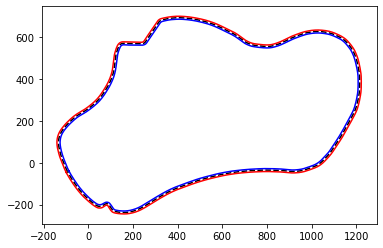

In [2]:
name = 'Thruxton'
track = RaceTrack(name)

plt.plot(track.centerline_arr[:, 0],track.centerline_arr[:, 1], 'k--')
plt.plot(track.inside_arr[:, 0], track.inside_arr[:, 1], 'b')
plt.plot(track.outside_arr[:, 0], track.outside_arr[:, 1], 'r')

In [46]:
idx = 7000
interval = 36

start_pt = track.centerline_arr[idx]
end_pt = track.centerline_arr[idx + interval]
yaw = track.race_yaw[idx]
yaw_min = min(track.race_yaw[idx:idx+interval]) - math.pi/6
yaw_max = max(track.race_yaw[idx:idx+interval]) + math.pi/6
v_min = 0
v_max = 30

pts = []
u_init = idx/track.raceline_length
for pt in [start_pt, end_pt]:
    for tck in [track.tck_in, track.tck_out]:
        _, p_closest, _ = track._calc_shortest_distance(pt, tck, u_init = u_init)
        pts.append(p_closest)

pts = np.array(pts)
pts_local = toLocal(pts, start_pt, yaw)
x_min, x_max, y_min, y_max = fitRectangle(pts_local)

g = Grid(np.array([x_min, y_min-1, v_min, yaw_min]), 
         np.array([x_max, y_max+1, v_max, yaw_max]), 4, np.array([60, 15, 20, 36]), [3])

# The value function should be calculated in the global coordinate.
basis = np.array([[np.cos(yaw), -np.sin(yaw), start_pt[0]], 
                  [np.sin(yaw), np.cos(yaw), start_pt[1]]])
V0 = track.get_init_value(g, u_init = u_init, basis=basis)

In [50]:
yaw#*180/np.pi

-2.6793719957278617

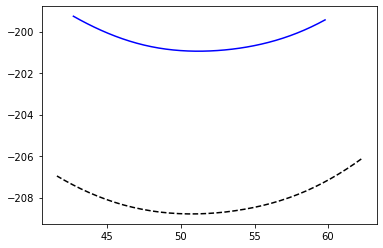

In [45]:
idx = 7000
plt.plot(track.centerline_arr[idx:idx+interval, 0],track.centerline_arr[idx:idx+interval, 1], 'k--')
plt.plot(track.inside_arr[idx:idx+interval, 0], track.inside_arr[idx:idx+interval, 1], 'b')
#plt.plot(track.outside_arr[idx:idx+interval*2, 0], track.outside_arr[idx:idx+interval*2, 1], 'r')

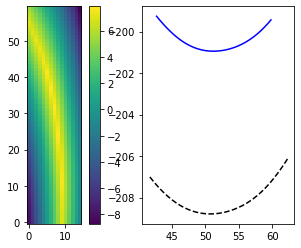

In [48]:
plt.subplot(1, 2, 1)
plt.imshow(V0[:, :, 0, 0], origin = 'lower')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.plot(track.centerline_arr[idx:idx+interval, 0],track.centerline_arr[idx:idx+interval, 1], 'k--')
plt.plot(track.inside_arr[idx:idx+interval, 0], track.inside_arr[idx:idx+interval, 1], 'b')
#plt.plot(track.outside_arr[idx:idx+interval*2, 0], track.outside_arr[idx:idx+interval*2, 1], 'r')

In [25]:
# Define my object
my_car = DubinsCar4D2(uMode = 'max')

# Look-back lenght and time step
lookback_length = 0.6
t_step = 0.1

small_number = 1e-5
tau = np.arange(start=0, stop=lookback_length + small_number, step=t_step)

po = PlotOptions("3d_plot", [0,1,3], [19])
HJSolver(my_car, g, V0, tau, "minVWithV0", po)

Welcome to optimized_dp 

usage: ipykernel_launcher.py [-h] [-p PLOT]
ipykernel_launcher.py: error: unrecognized arguments: --ip=127.0.0.1 --stdin=9053 --control=9051 --hb=9050 --Session.signature_scheme="hmac-sha256" --Session.key=b"041436c9-98bc-435f-acd1-9af5dd5da66a" --shell=9052 --transport="tcp" --iopub=9054 --f=/tmp/tmp-13399nSh6vsNuK2jJ.json


SystemExit: 2

(-220.0, -150.0)

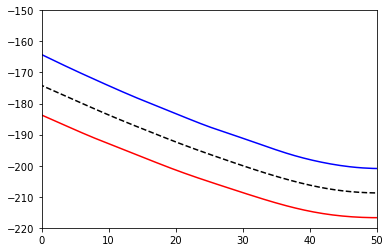

In [4]:
from Grid.GridProcessing import Grid
g = Grid(np.array([0.0, -220.0, 0.0, -math.pi]), 
         np.array([50.0, -150.0, 4.0, math.pi]), 
         4, np.array([60, 60, 20, 36]), [3])

name = 'Thruxton'
track = RaceTrack(name)

plt.plot(track.centerline_arr[:, 0],track.centerline_arr[:, 1], 'k--')
plt.plot(track.inside_arr[:, 0], track.inside_arr[:, 1], 'b')
plt.plot(track.outside_arr[:, 0], track.outside_arr[:, 1], 'r')

V0 = track.get_init_value(g, )
plt.xlim(0, 50)
plt.ylim(-220, -150)

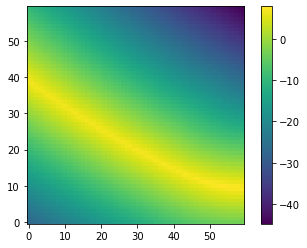

In [9]:
point

array([-92.91107557, -43.30399747])

len(track.outside_arr)